In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations

In [22]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,minmax_scale

In [105]:
path="data2/"
files=os.listdir(path) 
data=pd.DataFrame()
for f in files:
    temp=pd.read_csv(path+f)
    data=pd.concat([temp,data]) 
print(data.shape[0])
data.head()

46747


,NEH,px_t,RMSE,fNatIsotopes,fNatIsotopes[0],current_Exp_isotope_distribution_t0[1],current_Exp_isotope_distribution_t0[0],fLabIsotopes[1],fLabIsotopes[0],current_Exp_isotope_distribution[1],current_Exp_isotope_distribution[0],NumberOfHydrogens,PeptideSeq,SeqMass,Charge,Exp_time
0,41,0.038559,0.113513,0.35096,0.38286,0.357849,0.392492,0.195546,0.076339,0.321954,0.273909,106,HEEQPAPAYEVHNR,559.59735,3,1
1,20,0.038559,0.088737,0.34844,0.42956,0.357914,0.449484,0.315642,0.195622,0.366433,0.371541,108,EEAVLFLLDLPK,693.89758,2,1
2,41,0.044796,0.105019,0.35096,0.38286,0.357849,0.392492,0.166025,0.058458,0.318667,0.215905,106,HEEQPAPAYEVHNR,559.59735,3,2
3,20,0.044796,0.070483,0.34844,0.42956,0.357914,0.449484,0.300447,0.171743,0.382896,0.2872,108,EEAVLFLLDLPK,693.89758,2,2
4,41,0.045805,0.089191,0.35096,0.38286,0.357849,0.392492,0.161525,0.055979,0.241553,0.216441,106,HEEQPAPAYEVHNR,559.59735,3,3


In [106]:
data.columns

Index(['NEH', 'px_t', 'RMSE', 'fNatIsotopes', 'fNatIsotopes[0]',
       'current_Exp_isotope_distribution_t0[1]',
       'current_Exp_isotope_distribution_t0[0]', 'fLabIsotopes[1]',
       'fLabIsotopes[0]', 'current_Exp_isotope_distribution[1]',
       'current_Exp_isotope_distribution[0]', 'NumberOfHydrogens',
       'PeptideSeq', 'SeqMass', 'Charge', 'Exp_time'],
      dtype='object')

In [99]:
y=data.NEH
x= data[['fNatIsotopes', 'fNatIsotopes[0]',
       'current_Exp_isotope_distribution_t0[1]',
       'current_Exp_isotope_distribution_t0[0]', 
       'current_Exp_isotope_distribution[1]',
       'current_Exp_isotope_distribution[0]', 'NumberOfHydrogens', 'Exp_time','SeqMass'
       ]]#'Charge','RMSE', 'fLabIsotopes[1]','fLabIsotopes[0]', 
# scaler = StandardScaler()
# x=scaler.fit_transform(x)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,shuffle=False)

0.12041736753777807 4.540983971002803


Text(0, 0.5, 'Predicted NEH')

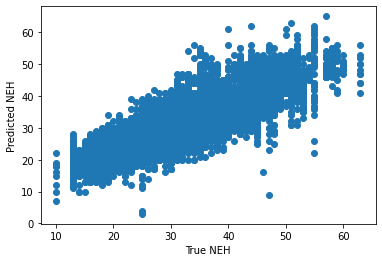

In [101]:
# poly model
interaction = PolynomialFeatures(
    degree = 4, 
	include_bias = False, interaction_only = True)
interaction_x = interaction.fit_transform(X_train)

# linear regression
regression = LinearRegression()

# Fit the linear regression
model = regression.fit(interaction_x, y_train)

#predict
ypred=model.predict(interaction.transform(X_test))
ypred=[round(y) for y in ypred]
print(metrics.mean_absolute_percentage_error(y_test, ypred),metrics.mean_squared_error(y_test, ypred)**0.5)
plt.scatter(y_test,ypred)
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

In [110]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X_train, y_train)
ypred=svr_rbf.predict(X_test)
ypred=[round(y) for y in ypred]
metrics.mean_absolute_percentage_error(y_test, ypred)

25.04340124003543

In [111]:
svr_lin.fit(X_train, y_train)
ypred=svr_lin.predict(X_test)
ypred=[round(y) for y in ypred]
metrics.mean_absolute_percentage_error(y_test, ypred) #mean_squared_error

15.87156775907883

In [ ]:
svr_poly.fit(X_train, y_train)
ypred=svr_poly.predict(X_test)
ypred=[round(y) for y in ypred]
metrics.mean_absolute_percentage_error(y_test, ypred)

In [37]:
import xgboost 
model = xgboost.XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(np.array(interaction_x), y_train)
ypred=model.predict(np.array(interaction.transform(X_test)))
ypred=[round(y) for y in ypred]
print(metrics.mean_absolute_percentage_error(y_test, ypred),metrics.mean_squared_error(y_test, ypred)**0.5)

0.12972140809380964 4.479804104916127


Epoch 1/200
502/502 [==============================] - 2s 2ms/step - loss: 127.9327 - val_loss: 84.7287
Epoch 2/200
502/502 [==============================] - 1s 2ms/step - loss: 76.2420 - val_loss: 73.7787
Epoch 3/200
502/502 [==============================] - 1s 2ms/step - loss: 66.4420 - val_loss: 66.2053
Epoch 4/200
502/502 [==============================] - 1s 2ms/step - loss: 60.6538 - val_loss: 60.0253
Epoch 5/200
502/502 [==============================] - 1s 2ms/step - loss: 54.4857 - val_loss: 57.1259
Epoch 6/200
502/502 [==============================] - 1s 2ms/step - loss: 45.3599 - val_loss: 45.8382
Epoch 7/200
502/502 [==============================] - 1s 2ms/step - loss: 39.8705 - val_loss: 44.5900
Epoch 8/200
502/502 [==============================] - 1s 2ms/step - loss: 37.8158 - val_loss: 53.1135
Epoch 9/200
502/502 [==============================] - 1s 2ms/step - loss: 35.7435 - val_loss: 31.6297
Epoch 10/200
502/502 [==============================] - 1s 2ms/step - lo

Epoch 80/200
502/502 [==============================] - 1s 2ms/step - loss: 22.5987 - val_loss: 27.3512
Epoch 81/200
502/502 [==============================] - 1s 2ms/step - loss: 22.3178 - val_loss: 24.1092
Epoch 82/200
502/502 [==============================] - 1s 2ms/step - loss: 22.3482 - val_loss: 22.1429
Epoch 83/200
502/502 [==============================] - 1s 2ms/step - loss: 22.8616 - val_loss: 22.4915
Epoch 84/200
502/502 [==============================] - 1s 2ms/step - loss: 22.6956 - val_loss: 29.9445
Epoch 85/200
502/502 [==============================] - 1s 2ms/step - loss: 22.4587 - val_loss: 23.5069
Epoch 86/200
502/502 [==============================] - 1s 2ms/step - loss: 22.0942 - val_loss: 24.4129
Epoch 87/200
502/502 [==============================] - 1s 2ms/step - loss: 23.2201 - val_loss: 25.2939
Epoch 88/200
502/502 [==============================] - 1s 2ms/step - loss: 22.8904 - val_loss: 25.9866
Epoch 89/200
502/502 [==============================] - 1s 2ms/s

502/502 [==============================] - 1s 3ms/step - loss: 20.7774 - val_loss: 20.1760
Epoch 159/200
502/502 [==============================] - 1s 3ms/step - loss: 20.8459 - val_loss: 21.5560
Epoch 160/200
502/502 [==============================] - 1s 3ms/step - loss: 21.3487 - val_loss: 21.9215
Epoch 161/200
502/502 [==============================] - 1s 3ms/step - loss: 20.8116 - val_loss: 22.0931
Epoch 162/200
502/502 [==============================] - 1s 3ms/step - loss: 20.8130 - val_loss: 20.8776
Epoch 163/200
502/502 [==============================] - 1s 3ms/step - loss: 20.8461 - val_loss: 21.1829
Epoch 164/200
502/502 [==============================] - 1s 3ms/step - loss: 21.2976 - val_loss: 23.3445
Epoch 165/200
502/502 [==============================] - 1s 3ms/step - loss: 20.7826 - val_loss: 21.9623
Epoch 166/200
502/502 [==============================] - 1s 2ms/step - loss: 20.5267 - val_loss: 20.7612
Epoch 167/200
502/502 [==============================] - 1s 2ms/step 

Text(0, 0.5, 'Predicted NEH')

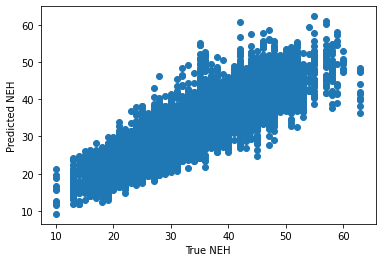

In [103]:
# Regression Example With Boston Dataset: Baseline
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
 
# define base model
 
model = Sequential()
model.add(Dense(128, input_shape=(255,), kernel_initializer='normal', activation='relu'))
model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
model.add(Dense(32,  kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam') 

model.fit(np.array(interaction.transform(X_train)).astype(np.float32), y_train.astype(np.float32),epochs=200,batch_size=50,validation_split=0.2)
ypred=model.predict(np.array(interaction.transform(X_test)).astype(np.float32))
# ypred=[round(y) for y in ypred.ravel()]


print(metrics.mean_absolute_percentage_error(y_test, ypred),metrics.mean_squared_error(y_test, ypred)**0.5)

plt.scatter(y_test,ypred)
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

In [102]:
np.array(interaction.transform(X_train)).shape

(31320, 255)